#Proyecto 4
###Redes Neuronales Convolucionales
####Daniel Rodriguez - 201715684


En primer lugar, se importan las librerias y funciones necesarias para desarrollar el proyecto.

In [1]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import os
import cv2
import keras
import imageio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Conv2DTranspose
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay



In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
ruta='drive/MyDrive/proyecto_final/PV01'
os.chdir(ruta)

Mounted at /content/drive


Se carga el set de datos y se transforma a un formato adecuado.

In [3]:

y=[]
x=[]
l_carpetas = os.listdir()
for i in l_carpetas:
  l_imagenes=os.listdir(i)
  for j in l_imagenes:   
    if 'label' not in j:
      img = imageio.imread(i+'/'+j)
      label=imageio.imread(i+'/'+j[:-4]+'_label.bmp')
      x.append(img/255)
      y.append(np.round(label/255))

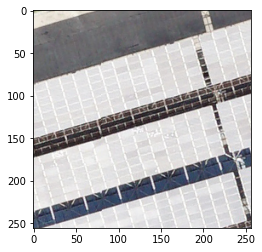

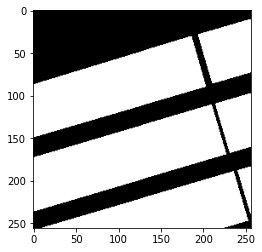

In [4]:
#suma=np.zeros((256,256))
i=32
plt.imshow(x[i])
plt.show()
plt.imshow(y[i],cmap='gray')

Se realiza el split para el set de entrenamiento, el set de prueba y el set de validación.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.3,random_state=3)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5,random_state=3)

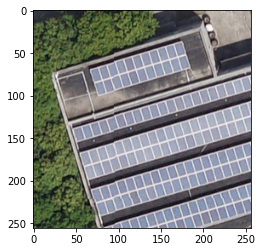

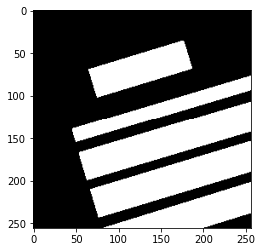

In [6]:
i=115
plt.imshow(x_train[i])
plt.show()
plt.imshow(y_train[i],cmap='gray')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 24)      5856      
                                                                 
 up_sampling2d (UpSampling2D  (None, 496, 496, 24)     0         
 )                                                               
                                                                 
 conv2d_transpose (Conv2DTra  (None, 498, 498, 24)     5208      
 nspose)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 249, 249, 24)      20760     
                                                        

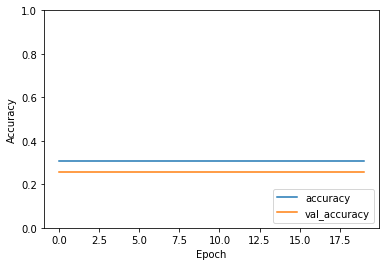

In [7]:
model1 = tf.keras.models.Sequential()
model1.add(Conv2D(24, (9, 9), activation='relu', input_shape=(256,256,3),kernel_regularizer='l1_l2'))
model1.add(UpSampling2D(size=(2, 2), interpolation='nearest'))
model1.add(Conv2DTranspose(24, (3,3),padding='valid'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(24, (6, 6), activation='relu',padding='same'))
model1.add(Conv2DTranspose(24, (5,5), strides=(2,2),padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(24, (5, 5), activation='relu',padding='same'))
model1.add(Conv2DTranspose(24, (5,5),padding='valid'))
model1.add(Conv2D(24, (4, 4), activation='relu',kernel_regularizer='l2',padding='same'))
model1.add(Conv2DTranspose(24, (6,6),padding='valid'))
model1.add(Conv2D(1,(3, 3), activation='softmax'))


print(model1.summary())

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model1.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=20,validation_data=(x_valid, y_valid))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_valid,  y_valid, verbose=2)


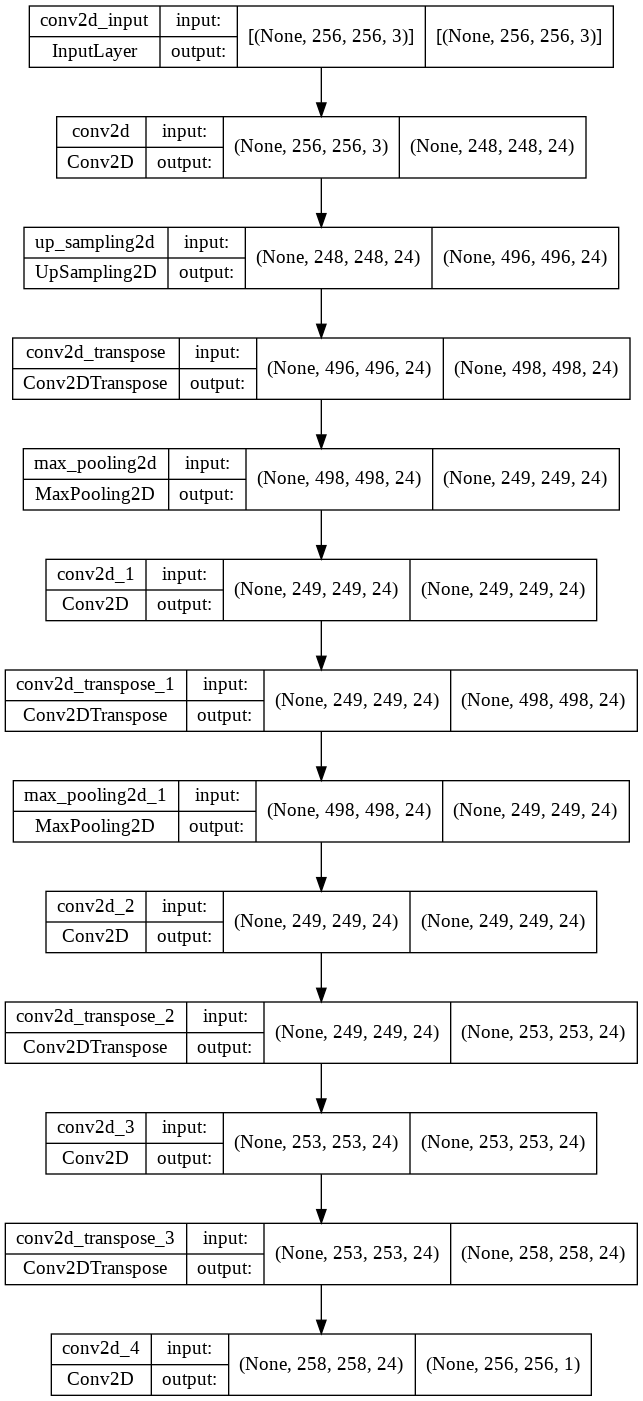

In [ ]:
#tf.keras.utils.plot_model(model1, show_shapes=True)

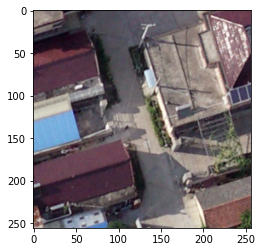

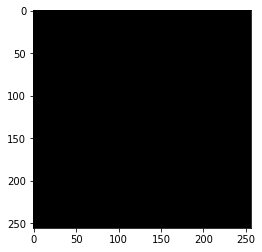

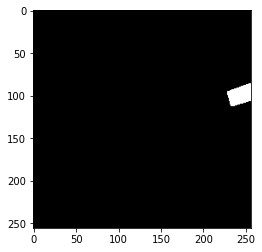

In [8]:
i=9
ivalid=np.resize(x_valid[i],(1,256,256,3))
plt.imshow(x_valid[i])
plt.show()
plt.imshow(np.resize(model1.predict(ivalid),(256,256)),cmap='gray')
plt.show()
plt.imshow(y_valid[i],cmap='gray')

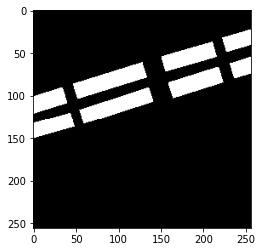

In [9]:
plt.imshow(y_valid[0],cmap='gray')

Matriz de confusion para el conujunto de validacion


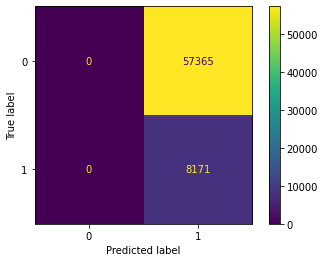

In [10]:
print('Matriz de confusion para el conujunto de validacion')
cm=confusion_matrix(np.resize(y_valid[0],(256*256)),np.resize(model1.predict(ivalid),(256*256)))
cm_display = ConfusionMatrixDisplay(cm).plot()

In [11]:
print('El f1 score respecto al conjunto de validacion es el siguiente:',f1_score(np.resize(y_valid[0],(256*256)),np.resize(model1.predict(ivalid),(256*256)),average='binary'))


El f1 score respecto al conjunto de validacion es el siguiente: 0.2217157122118659


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      15616     
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 64)      102464    
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 1)       65        
                                                                 
Total params: 155,073
Trainable params: 155,073
Non-trainable params: 0
_________________________________________________________________
None
Num GPUs Available:  1
Epoch 1/20
15/15 [==============================] - 16s 503ms/step - loss: 10.5981 - accuracy: 0.3050 - val_loss: 11.3564 - val_accuracy: 0.2553
Epoch 2

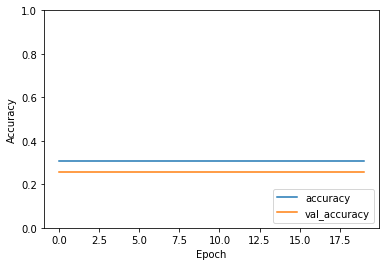

In [12]:
model2 = tf.keras.models.Sequential()
model2.add(Conv2D(64, (9, 9), activation='relu', input_shape=(256,256,3),padding='same'))
model2.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model2.add(Conv2D(1, (1, 1), activation='softmax',padding='same'))



print(model2.summary())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model2.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

history = model2.fit(x_train, y_train, epochs=20,validation_data=(x_valid, y_valid))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_valid,  y_valid, verbose=2)



In [13]:
#tf.keras.utils.plot_model(model2, show_shapes=True)


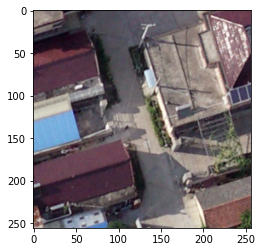

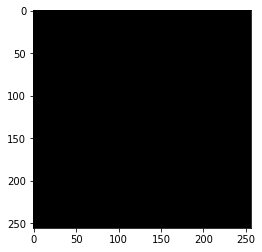

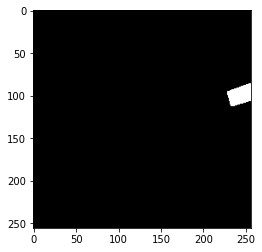

In [14]:
i=9
ivalid=np.resize(x_valid[i],(1,256,256,3))
plt.imshow(x_valid[i])
plt.show()
plt.imshow(np.resize(model2.predict(ivalid),(256,256)),cmap='gray')
plt.show()
plt.imshow(y_valid[i],cmap='gray')